# Mountain Car Continuous - PPO

In [ ]:
pip install stable-baselines3[extra]

In [ ]:
import gymnasium as gym

from stable_baselines3 import PPO

In [ ]:
env = gym.make("MountainCarContinuous-v0", render_mode="rgb_array", goal_velocity=0.1)  # default goal_velocity=0

model = PPO("MlpPolicy", env, verbose=1, learning_rate=0.02,batch_size=64)
model.learn(total_timesteps=50000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -52.3    |
| time/              |          |
|    fps             | 1157     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 999       |
|    ep_rew_mean          | -75.5     |
| time/                   |           |
|    fps                  | 715       |
|    iterations           | 2         |
|    time_elapsed         | 5         |
|    total_timesteps      | 4096      |
| train/                  |           |
|    approx_kl            | 2494378.5 |
|    clip_fraction        | 0.997     |
|    clip_range           | 0.2       |
|    entropy_loss         | 1.51      |
|    e

In [ ]:
#testowanie wytrenowanego modelu
vec_env = model.get_env()
obs = vec_env.reset()
num_episodes = 5000


episode_rewards = []
for episode in range(num_episodes):
    done = False
    episode_reward = 0

    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, info = vec_env.step(action)
        episode_reward += sum(reward)
    episode_rewards.append(episode_reward)

KeyboardInterrupt: 

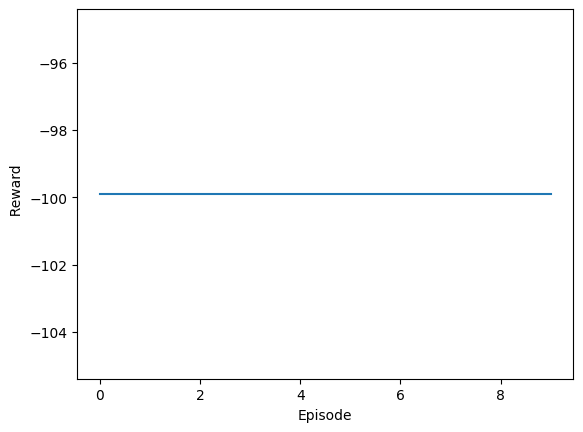

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def get_moving_avgs(arr, window):
        return np.convolve(arr, np.ones(window), 'valid') / window

window_size = 1
moving_avgs = get_moving_avgs(episode_rewards, window_size)


plt.plot(moving_avgs)
plt.xlabel('Episode')
plt.ylabel('  Reward')
plt.show()
